In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
btc_df = pd.read_csv('BTCUSDF.csv')
btc_df.head()

,Unnamed: 0,Open_time,Open,High,Low,Close,Volume,Close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore,Type
0,0,2017-08-01,4261.48,4745.42,3400.00,4724.89,10015.640272,2017-08-31 23:59:59.999,4.253830e+07,69180,4610.019431,1.941923e+07,10779.838731,BTCUSDT
1,1,2017-09-01,4689.89,4939.19,2817.00,4378.51,27634.189120,2017-09-30 23:59:59.999,1.104931e+08,228745,12353.170043,4.919992e+07,11158.769785,BTCUSDT
2,2,2017-10-01,4378.49,6498.01,4110.00,6463.00,41626.388463,2017-10-31 23:59:59.999,2.287368e+08,303389,19231.858853,1.053401e+08,15785.318159,BTCUSDT
3,3,2017-11-01,6463.00,11300.03,5325.01,9838.96,108487.978119,2017-11-30 23:59:59.999,8.927488e+08,577424,55476.983538,4.644876e+08,34507.182977,BTCUSDT
4,4,2017-12-01,9837.00,19798.68,9380.00,13716.36,408476.658399,2017-12-31 23:59:59.999,5.975574e+09,3082883,213940.587099,3.122654e+09,0.000000,BTCUSDT


In [58]:
fed_df = pd.read_csv('FEDFUNDS.csv')
fed_df.head()

,DATE,FEDFUNDS
0,2017-08-01,1.16
1,2017-09-01,1.15
2,2017-10-01,1.15
3,2017-11-01,1.16
4,2017-12-01,1.30


In [59]:
fed_df["DATE"] = pd.to_datetime(fed_df["DATE"], format='%Y-%m-%d')
btc_df["DATE"] = pd.to_datetime(btc_df["Open_time"], format='%Y-%m-%d')

In [60]:
btc_df = btc_df[['DATE', "Open"]]
btc_df["BTC_10000USD"] = btc_df["Open"] / 10000
btc_df.columns = ['DATE', 'BTC_10000USD']

In [61]:
combine_df = pd.merge(fed_df, btc_df, how='inner', on='DATE')

In [62]:
combine_df.head()

,DATE,FEDFUNDS,BTC_10000USD
0,2017-08-01,1.16,4261.48
1,2017-09-01,1.15,4689.89
2,2017-10-01,1.15,4378.49
3,2017-11-01,1.16,6463.00
4,2017-12-01,1.30,9837.00


<AxesSubplot:>

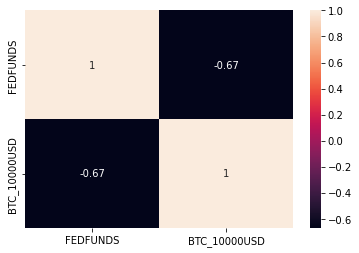

In [63]:
sns.heatmap(combine_df[['FEDFUNDS', 'BTC_10000USD']].corr(), annot=True)

<AxesSubplot:xlabel='FEDFUNDS', ylabel='BTC_10000USD'>

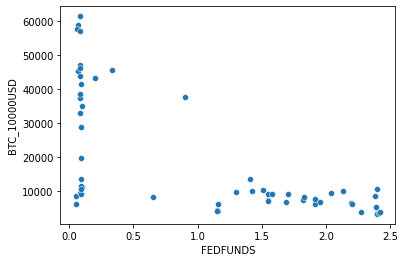

In [64]:
sns.scatterplot(x='FEDFUNDS', y='BTC_10000USD', data=combine_df)

<AxesSubplot:xlabel='DATE', ylabel='FEDFUNDS'>

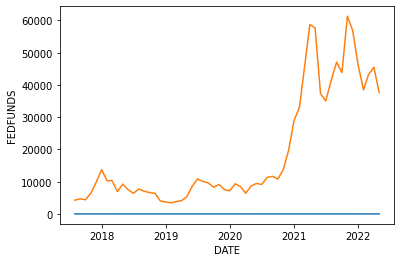

In [65]:
sns.lineplot(x="DATE", y="FEDFUNDS", data=combine_df)
sns.lineplot(x="DATE", y="BTC_10000USD", data=combine_df)